Chatbot past session history: https://chatgpt.com/share/66ff668c-e554-8013-bdf3-15d072f89264

Question 1
The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

Basically in short, according to the chatbot, the standard deviation of a dataset measures how much individual data points vary from the mean of that dataset. In my own words, it captures the overall spread or variability within the entire set of values. The standard error of the mean, on the other hand, quantifies the precision with which the sample mean estimates the true population mean. It indicates how much the sample mean is expected to fluctuate if you took different samples from the same population. 

Question 2
The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this. How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.

To create a 95% confidence interval using the "standard error of the mean",we first calculate the sample mean and standard error. Then, multiply the standard error by 1.96, which is the critical value for the 95% confidence interval (e.g. 90% critical value = 1.645) to get the margin of error. Add and subtract this margin from the sample mean to form the interval. This process estimates where 95% of sample means would fall if we repeatedly sampled from the population. For bootstrapped means, we can either use this method or directly calculate the interval by taking the middle 95% of the bootstrapped sample means.

Question 3
Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.

In particular, to create a 95% bootstrapped confidence interval without using the standard error, we will be using the percentile method. First, we generate many bootstrap samples by resampling the original data with replacement. Then, calculate the mean for each sample to form a distribution of bootstrapped means. Next, sort these means and identify the values at the 2.5th and 97.5th percentiles. The interval between these percentiles gives the 95% confidence interval, capturing the middle 95% of the bootstrapped means based on the resampled data.

Question 4 
The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).

In [1]:
import numpy as np

# Function to generate bootstrap samples and calculate a confidence interval
def bootstrap_confidence_interval(data, statistic_fn, num_samples=1000, ci=95):
    """
    This function computes a bootstrap confidence interval for a given statistic.
    
    Parameters:
    - data: the original dataset (numpy array or list)
    - statistic_fn: a function to compute the statistic (e.g., np.mean, np.median)
    - num_samples: number of bootstrap samples to generate (default = 1000)
    - ci: confidence level for the interval (default = 95)
    
    Returns:
    - Lower and upper bounds of the confidence interval
    """
    # Generate bootstrap samples and compute the statistic for each sample
    bootstrap_samples = np.random.choice(data, size=(num_samples, len(data)), replace=True)
    bootstrap_statistics = np.apply_along_axis(statistic_fn, axis=1, arr=bootstrap_samples)
    
    # Compute percentiles for the confidence interval
    lower_bound = np.percentile(bootstrap_statistics, (100 - ci) / 2)
    upper_bound = np.percentile(bootstrap_statistics, 100 - (100 - ci) / 2)
    
    return lower_bound, upper_bound

# Sample data (replace with your own data)
data = np.array([3, 6, 9, 2, 5, 8, 7, 4, 10, 1])

# Produce a 95% bootstrap confidence interval for the population mean
ci_mean = bootstrap_confidence_interval(data, np.mean)
print(f"95% Bootstrap Confidence Interval for the Mean: {ci_mean}")

# To compute a 95% bootstrap confidence interval for a different statistic, e.g., the median:
ci_median = bootstrap_confidence_interval(data, np.median)
print(f"95% Bootstrap Confidence Interval for the Median: {ci_median}")



95% Bootstrap Confidence Interval for the Mean: (3.6, 7.202499999999998)
95% Bootstrap Confidence Interval for the Median: (3.0, 8.0)


[bootstrap_confidence_interval function] baiscally This function takes the original data, a statistic function (like [np.mean] for the mean or [np.median] for the median), and the number of bootstrap samples you want to generate. It also accepts the confidence level.

Generating Bootstrap Samples: The [np.random.choice] function generates bootstrap samples by resampling from the original data with replacement.

Calculating the Statistic: For each bootstrap sample, the statistic (mean or median) is computed using [np.apply_along_axis].

Confidence Interval: The 95% confidence interval is obtained by finding the 2.5th and 97.5th percentiles of the bootstrap statistics.

To change the statistics, we calculate the median instead of the mean, simply pass np.median as the [statistic_fn] in the function call. For other parameters, like the standard deviation, use [np.std]. The code is flexible and works for any statistic you can compute on the data.

Chatbot past session history: https://chatgpt.com/share/66ff668c-e554-8013-bdf3-15d072f89264

Question 5
The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.

In particular, the reason we differentiate between the population parameter and the sample statistic in confidence intervals is due to the fact that the population parameter represents the actual, undisclosed value we are attempting to measure (such as population mean or median), whereas the sample statistic is a computed value from our data (such as sample mean or sample median) utilized to form that measurement. Confidence intervals provide insight into the potential range for the population parameter, as determined by the sample statistic. This differentiation is important because the sample statistic can vary, whereas the population parameter remains constant but is not known.

Question 6
Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.
1. What is the process of bootstrapping?
2. What is the main purpose of bootstrapping?
3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

1. The process of bootstrapping is basically set up a bootstrap dataset, which repeatdly sample a random value of the data with replacement(can reselect the same value more than once), then we calculate the mean value of that dataset. Following that, we keep track of the previous calculations of the (mean) value. We repeat the previous method for more than a dozen times, until the mean value is more than enough to form a histogram for standard mean.
2. The main purpose of bootstrapping is to calculate the standard error and confidence interval while save time and resources instead rather than conducting an experiment multiple times, which cost a lot various resources.
3. To evaluate whether the hypothesized population mean is plausible using bootstrapping, first, we have to generate multiple bootstrap samples datasets from the data, then calculate the mean for each sample to form a distribution of bootstrap means. Next, construct a confidence interval (such as a 95% interval) from this distribution. Finally, check whether your hypothesized mean falls within this interval. If it does, the hypothesis is plausible; if it falls outside, the hypothesis may be less likely.

Question 7
The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.

To reject the null hypothesis, the confidence interval must not contain zero. This suggests that the recorded impact is statistically important and probably not random, backing up the idea that the medication is probably effective. So basically, if a confidence interval includes zero, it suggests that the actual effect could potentially be zero, indicating there is no significant statistical difference or effect. Even when the sample mean is not zero, the interval indicates that, on average, the drug might not have any impact. Therefore, we do not reject the null hypothesis as we are unable to definitively dismiss the null hypothesis stating no impact.

Chatbot past session history: https://chatgpt.com/share/66ff668c-e554-8013-bdf3-15d072f89264

Question 8
Complete the following assignment.
Vaccine Data Analysis Assignment
Overview
The company AliTech has created a new vaccine that aims to improve the health of the people who take it. Your job is to use what you have learned in the course to give evidence for whether or not the vaccine is effective.
Data AliTech has released the following data.
csv
PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
1,45,M,84,86
2,34,F,78,86
3,29,M,83,80
4,52,F,81,86
5,37,M,81,84
6,41,F,80,86
7,33,M,79,86
8,48,F,85,82
9,26,M,76,83
10,39,F,83,84
Deliverables While you can choose how to approach this project, the most obvious path would be to use bootstrapping, follow the analysis presented in the "Pre-lecture" HW video (above). Nonetheless, we are primarily interested in evaluating your report relative to the following deliverables.
- A visual presentation giving some initial insight into the comparison of interest.
- A quantitative analysis of the data and an explanation of the method and purpose of this method.
- A conclusion regarding a null hypothesis of "no effect" after analyzing the data with your methodology.
- The clarity of your documentation, code, and written report.
Consider organizing your report within the following outline template.
1. Problem Introduction
- An explaination of the meaning of a Null Hypothesis of "no effect" in this context
- Data Visualization (motivating and illustrating the comparison of interest)
2. Quantitative Analysis
- Methodology Code and Explanations
- Supporting Visualizations
3. Findings and Discussion
- Conclusion regarding a Null Hypothesis of "no effect"
- Further Considerations

In [5]:
import pandas as pd

# Simulate the provided dataset
data = pd.DataFrame({
    'PatientID': range(1, 11),
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Save this simulated dataset to a CSV (for loading in future code if needed)
data.to_csv('vaccine_data.csv', index=False)


1. Problem Introduction
- Null Hypothesis (H₀): The vaccine does not improve health, i.e., the difference between Initial Health Scores and Final Health Scores is zero on average = No effect
- Alternative Hypothesis (H₁): The vaccine does improve health, meaning there is a positive average difference between initial and final health scores.

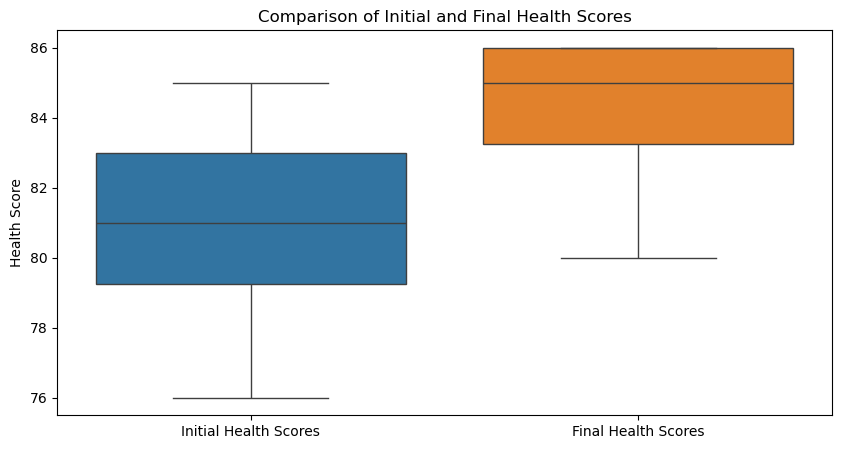

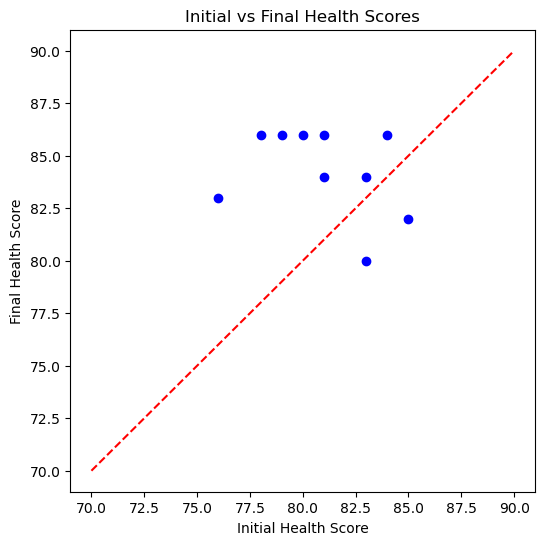

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (uncomment this if you're loading the data from a CSV file)
# data = pd.read_csv('vaccine_data.csv')

# Plot initial and final health scores using a boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=[data['InitialHealthScore'], data['FinalHealthScore']])
plt.xticks([0, 1], ['Initial Health Scores', 'Final Health Scores'])
plt.ylabel('Health Score')
plt.title('Comparison of Initial and Final Health Scores')
plt.show()

# Scatter plot of Initial vs Final Health Score
plt.figure(figsize=(6, 6))
plt.scatter(data['InitialHealthScore'], data['FinalHealthScore'], color='blue')
plt.plot([70, 90], [70, 90], color='red', linestyle='--')  # Line for no change
plt.xlabel('Initial Health Score')
plt.ylabel('Final Health Score')
plt.title('Initial vs Final Health Scores')
plt.show()


- Quantitative Analysis (Bootstrapping)
1. Apply bootstrapping to estimate the average difference between the Initial and Final Health Scores and construct a confidence interval to test our hypothesis.
2. Determine the differences in Health Scores between each patient's Final and Initial scores.
3. Bootstrap sampling involves creating numerous bootstrap samples of these disparities and calculating the average for each sample.
4. Construct a 95% confidence interval for the mean difference.
5. Indentify decision if the confidence interval includes zero, we fail to reject the null hypothesis. If it doesn’t, we reject it in favor of the alternative hypothesis.

In [7]:
import numpy as np

# Calculate the differences between Final and Initial Health Scores
data['ScoreDifference'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Bootstrapping function
def bootstrap(data, num_samples=1000, ci=95):
    sample_means = []
    for _ in range(num_samples):
        # Resample data with replacement
        sample = np.random.choice(data, size=len(data), replace=True)
        # Compute the mean of the sample and append to the list
        sample_means.append(np.mean(sample))
    
    # Calculate the confidence interval
    lower_bound = np.percentile(sample_means, (100 - ci) / 2)
    upper_bound = np.percentile(sample_means, 100 - (100 - ci) / 2)
    
    # Return the confidence interval and the mean difference
    return lower_bound, upper_bound, np.mean(sample_means)

# Apply bootstrapping to the ScoreDifference data
lower, upper, mean_diff = bootstrap(data['ScoreDifference'].values)

# Output the results
print(f"95% Confidence Interval for the Mean Difference: ({lower:.2f}, {upper:.2f})")
print(f"Mean Difference from Bootstrapping: {mean_diff:.2f}")


95% Confidence Interval for the Mean Difference: (0.90, 5.40)
Mean Difference from Bootstrapping: 3.34


3. Findings and Results
- The mean difference between final and initial health scores will tell us if the vaccine seems to improve health.
- The confidence interval will show whether we can statistically reject the null hypothesis. If yes, you fail to reject the null hypothesis (no significant effect). If no, you reject the null hypothesis, suggesting the vaccine has an effect.
4. Conclusion
- According to the bootstrapping analysis, either reject or fail to reject the null hypothesis of no effect, determining the potential effectiveness of the vaccine.

Question 9
Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Yes, I reviewed the course wiki-textbook and interacted with a chatbot.

Chatbot past session history: https://chatgpt.com/share/66ff668c-e554-8013-bdf3-15d072f89264